**İnternetten bir film izlemek istediğinizi hayal edin. İnternetteki film puanlamalarına ne kadar güvenebilirsiniz ? Özellikle reytingi gösteren aynı şirket sinema bileti satarak da para kazanıyorsa. Sizce de derecelendirme konusunda insanları yanlış yönlendirmesi söz konusu olabilir mi ?**

Amacımız Fandango websitesinin ratingler konusunda bir yanlış yapıp yapmadığını emin bir şekilde ispatlamak.

Elimizde biri şüphelenilen Fandango sitsine ait yıldızlar ve film derecelendirmeleri içeriyor. Diğeri ise diğer film sitelerindeki film derecelendirmeleri için veriler içeren toplam 2 csv dosyası vardır.

In [70]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

Fandangonun filmleri puanlama ve derecelendirme konusunda taraflı davranıp davranmadığını analiz etmeye başlayalım !

In [71]:
fandango = pd.read_csv("/kaggle/input/film-dataset/fandango_scrape.csv")

In [33]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [72]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [35]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Verimizdeki filmlere ait votes ile rating arasındaki ilişkiyi keşfedeceğiz. Derecelendirme ve oylar arasındaki ilişkiyi gösteren bir scatterplot grafiği oluşturalım.

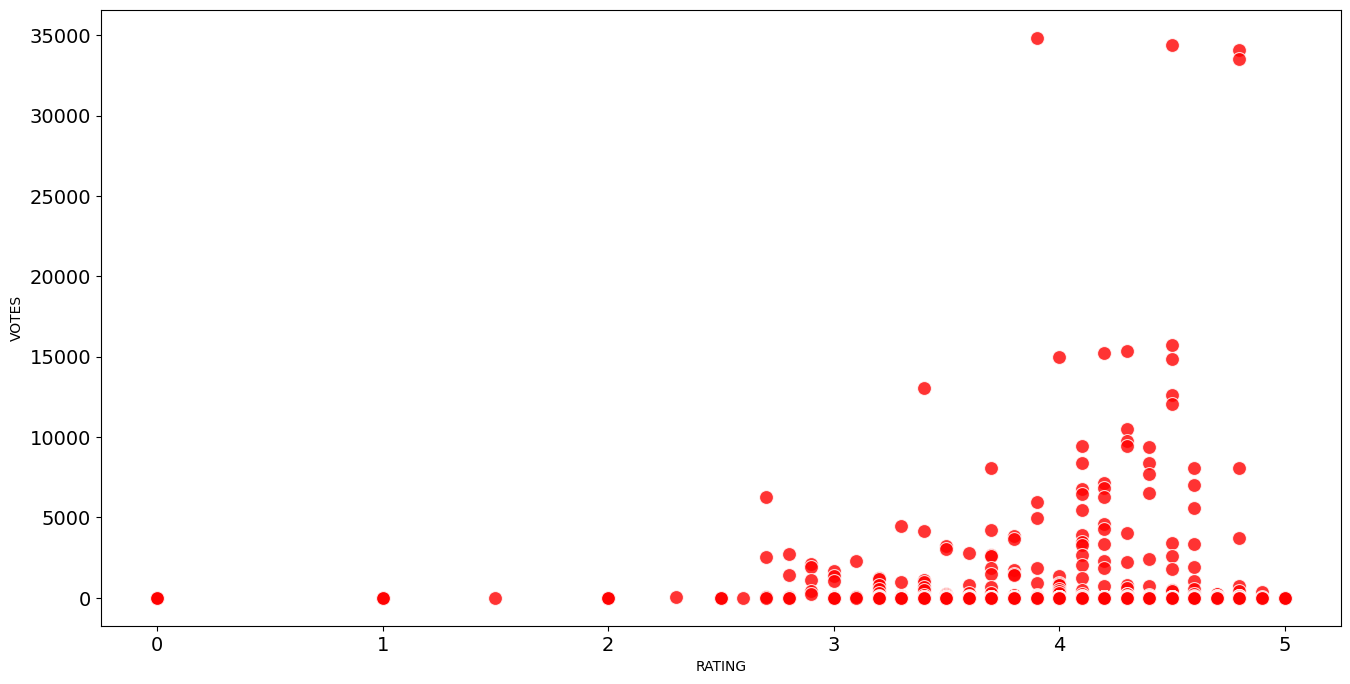

In [73]:
plt.rcParams["figure.figsize"]=(16,8)
sns.scatterplot(data=fandango, x="RATING", y="VOTES", 
                alpha=0.8, color= 'red', 
                s = 100)
plt.show()

 'Yıl' sütunu ekleyelim.

In [78]:
fandango["YEAR"] = fandango["FILM"].astype(str).str[-6:]
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015)
1,Jurassic World (2015),4.5,4.5,34390,(2015)
2,American Sniper (2015),5.0,4.8,34085,(2015)
3,Furious 7 (2015),5.0,4.8,33538,(2015)
4,Inside Out (2015),4.5,4.5,15749,(2015)
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,(2015)
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,(2015)
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,(2015)
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,(1964)


Elimizdeki Fandango verilerinde yıl başına düşen film sayılarını bulalım.

In [79]:
fandango.groupby('YEAR')['FILM'].count() 

YEAR
(1964)      1
(2012)      1
(2014)     23
(2015)    478
(2016)      1
Name: FILM, dtype: int64

Bir plot ile yıllara düşen film sayılarını görselleştirelim.

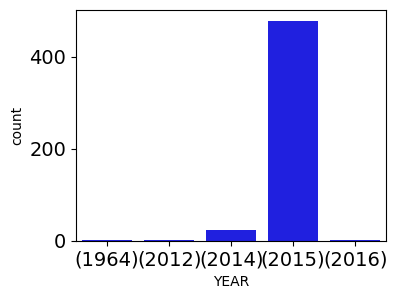

In [80]:
number_of_movies_per_year = fandango.groupby('YEAR')['FILM'].count() 

fig, ax = plt.subplots(figsize = (4, 3))

sns.barplot(x= number_of_movies_per_year.index,
            y=number_of_movies_per_year.values, color= 'blue')

ax.set_ylabel("count")
          
plt.show()

En fazla oyu alan 10 film buluyoruz.

In [81]:
fandango.nlargest(10 , 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015)
1,Jurassic World (2015),4.5,4.5,34390,(2015)
2,American Sniper (2015),5.0,4.8,34085,(2015)
3,Furious 7 (2015),5.0,4.8,33538,(2015)
4,Inside Out (2015),4.5,4.5,15749,(2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,(2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,(2015)
7,Minions (2015),4.0,4.0,14998,(2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,(2015)
9,Into the Woods (2014),3.5,3.4,13055,(2014)


Kaç tane filmin 0 vote'u aldığını buluyoruz.

In [82]:
fandango[fandango["VOTES"] == 0] 

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,(2015)
436,7 Minutes (2015),0.0,0.0,0,(2015)
437,A Year in Champagne (2015),0.0,0.0,0,(2015)
438,Balls Out (2015),0.0,0.0,0,(2015)
439,Before I Wake (2015),0.0,0.0,0,(2015)
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,(2015)
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,(2015)
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,(2015)
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,(1964)


In [83]:
fandango[fandango["VOTES"] == 0].shape[0]

69

Sıfır oyu olan filmleri kaldırarak yalnızca incelenen filmlerin dataframe'ini oluşturalım.

In [84]:
fandango= fandango[fandango['VOTES'] != 0]
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015)
1,Jurassic World (2015),4.5,4.5,34390,(2015)
2,American Sniper (2015),5.0,4.8,34085,(2015)
3,Furious 7 (2015),5.0,4.8,33538,(2015)
4,Inside Out (2015),4.5,4.5,15749,(2015)
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,(2015)
431,The Intern (2015),5.0,5.0,1,(2015)
432,The Park Bench (2015),5.0,5.0,1,(2015)
433,The Wanted 18 (2015),5.0,5.0,1,(2015)


Bazı filmlerde usulsüzlük yapıldığı ve kullanıcılara gösterilen STARS değerlerinin gerçek RATING değerlerinden biraz daha fazla çıktığı düşünülüyor. 'STARS_DIFF' adında yeni bir column ekleyerek STARS ile RATING arasındaki farkları bu column'da tutalım.

In [85]:
 fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015)
1,Jurassic World (2015),4.5,4.5,34390,(2015)
2,American Sniper (2015),5.0,4.8,34085,(2015)
3,Furious 7 (2015),5.0,4.8,33538,(2015)
4,Inside Out (2015),4.5,4.5,15749,(2015)
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,(2015)
431,The Intern (2015),5.0,5.0,1,(2015)
432,The Park Bench (2015),5.0,5.0,1,(2015)
433,The Wanted 18 (2015),5.0,5.0,1,(2015)


In [87]:
fandango['STARS_DIFF'] = fandango['STARS'] - fandango['RATING']
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,(2015),0.0
2,American Sniper (2015),5.0,4.8,34085,(2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,(2015),0.2
4,Inside Out (2015),4.5,4.5,15749,(2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,(2015),0.0
431,The Intern (2015),5.0,5.0,1,(2015),0.0
432,The Park Bench (2015),5.0,5.0,1,(2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,(2015),0.0


STARS_DIFF sütunundaki verilerin kaçar kez oluştuğunu count edip ve plotlayalım

In [97]:
fandango["STARS_DIFF"].value_counts().drop_duplicates()

0.0    107
0.2     82
0.3     72
0.4     44
0.1     40
0.5     37
0.1     26
1.0      1
Name: STARS_DIFF, dtype: int64

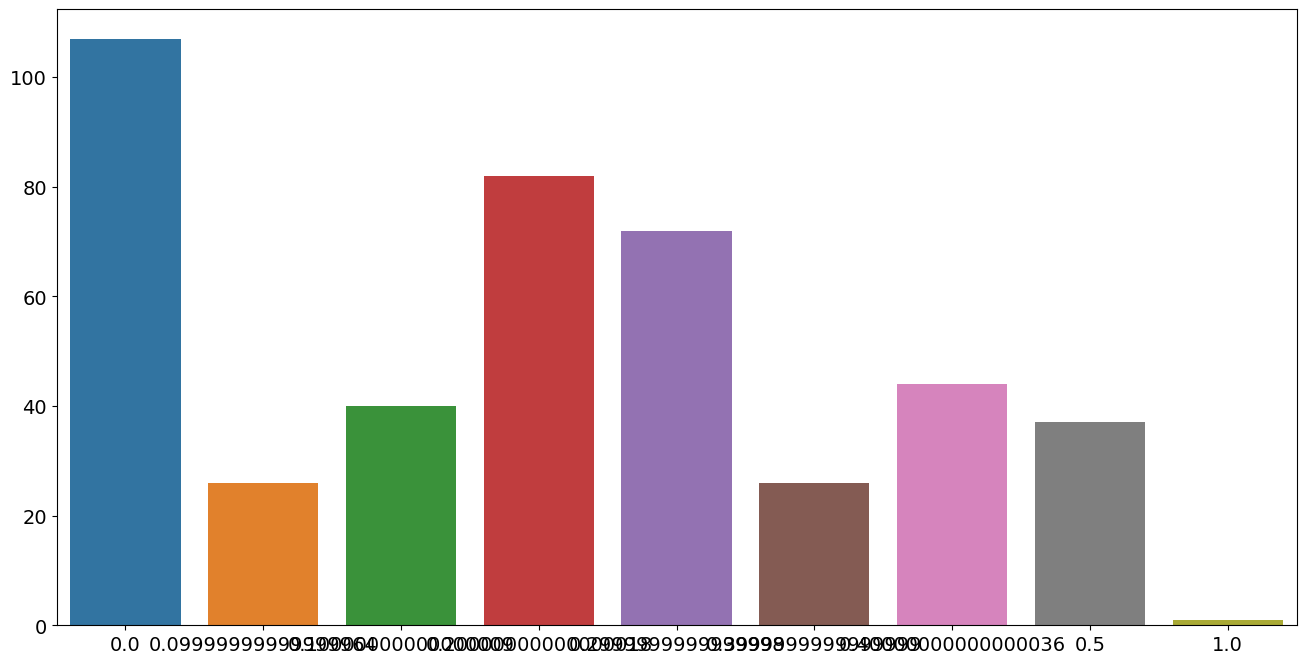

In [98]:
how_many_times = fandango["STARS_DIFF"].value_counts()

plt.rcParams["figure.figsize"]=(16,8)

sns.barplot(x= how_many_times.index,
            y= how_many_times.values)

ax.set_ylabel("count")

          
plt.show()

Üstteki plot'dan gördüğümüz üzere STARS_DIFF'i 1 olan film bile var. Bu çok yoğun usulsüzlük yapılan filmi getirip, inceleyelim.

In [99]:
fandango.loc[fandango["STARS_DIFF"] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,(2015),1.0


*Fandango Puanlamalarını Başka Sitelerle Karşılaştıralım*

In [100]:
all_sites = pd.read_csv("/kaggle/input/film-dataset/all_sites_scores.csv")

In [101]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [102]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [103]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


Önce Rotten Tomatoes'i inceleyelim. RottenTomatoes adında gerçek yorumcuların derecelendirmeleri ve RottenTomatoes_User adında kullanıcıların derecelendirmelerini içeren bir sütun bulunuyor. Bu sütunları plot edelim.

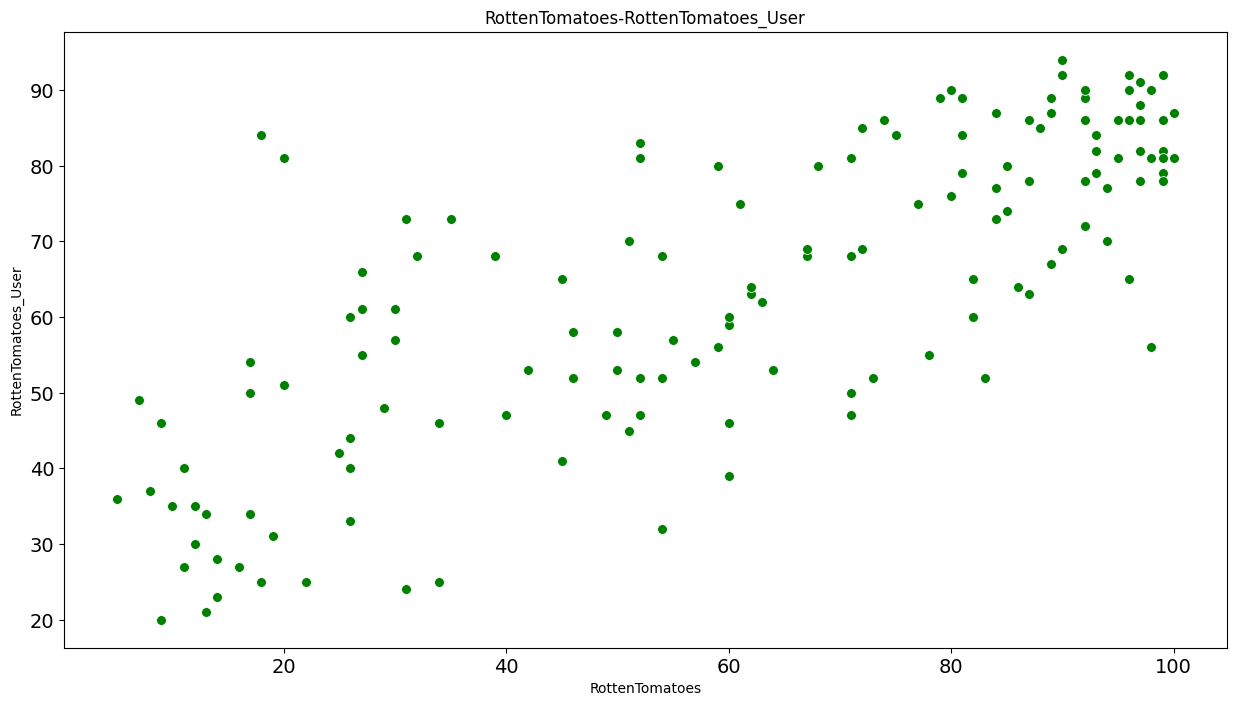

In [104]:
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14


sns.scatterplot(
    data=all_sites,
    x="RottenTomatoes",
    y="RottenTomatoes_User", s= 50, color = 'green')

plt.title("RottenTomatoes-RottenTomatoes_User")
plt.show()

 Rotten_DIFF adında bir column oluşturalımve bu column RottenTomatoes-RottenTomatoes_User bilgilerinden oluşsun.

In [105]:
all_sites["Rotten_DIFF"] = all_sites["RottenTomatoes"]- all_sites["RottenTomatoes_User"]
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


RT Eleştirmen Puanı ile RT Kullanıcı Puanı arasındaki farkların dağılımını çizelim. Bu dağılım grafiğinde negatif değerler olmalıdır. Bu dağıtımı görüntülemek için KDE veya Histogramları kullanabiliriz.

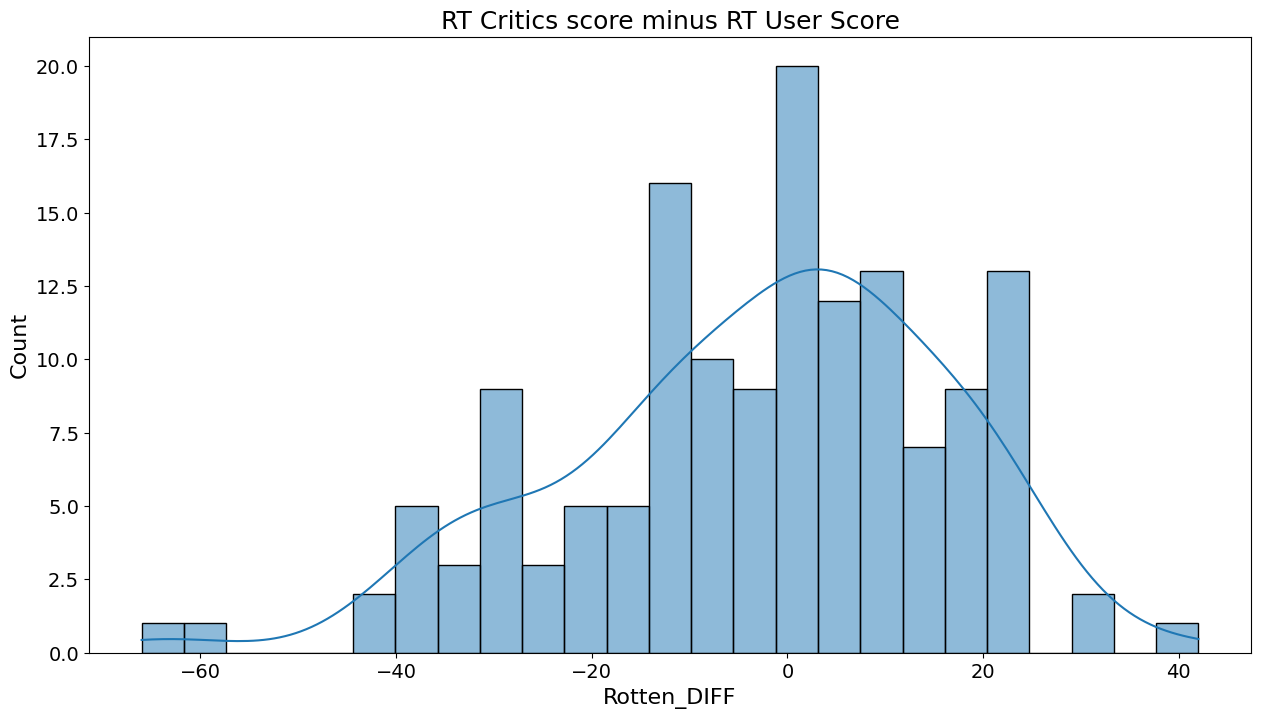

In [106]:
sns.histplot(all_sites["Rotten_DIFF"], bins=25, kde=True)

plt.title("RT Critics score minus RT User Score", fontsize = 18)
plt.xlabel("Rotten_DIFF",fontsize = 16)
plt.ylabel("Count", fontsize = 16)

plt.show()

Kullanıcı ile eleştirmen puanlamaları arasındaki farkın(Rotten_DIFF) en yüksek ve en düşük olduğu filmlere bi bakalım.

In [107]:
all_sites.nlargest(1,"Rotten_DIFF")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42


In [108]:
all_sites.nsmallest(1,"Rotten_DIFF")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66


Ortalama olarak kullanıcıların, eleştirmenlerden daha fazla sevdiği 5 filmi getirelim.

In [109]:
all_sites.nsmallest(5,"Rotten_DIFF") 

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


Şimdi de tam tersi, kullanıcıların eleştirmenlerden bile daha çok sevmediği 5 filmi getirelim.

In [110]:
all_sites.nlargest(5,"Rotten_DIFF")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


**Fandango sitesi kullanıcıları film puanlamaları konusunda kayda değer ölçüde kandırıyor.**

 Derecelendirme(Rating) ve Oylar(Votes) arasındaki ilişkiyi gösteren scatterplot grafiğinde birden fazla outliers olduğunu görüyoruz.
 İnsanları film hakkında yanıltıyor olabilir. Puanlarına bakıp, filmi iyi zannedebilirler.

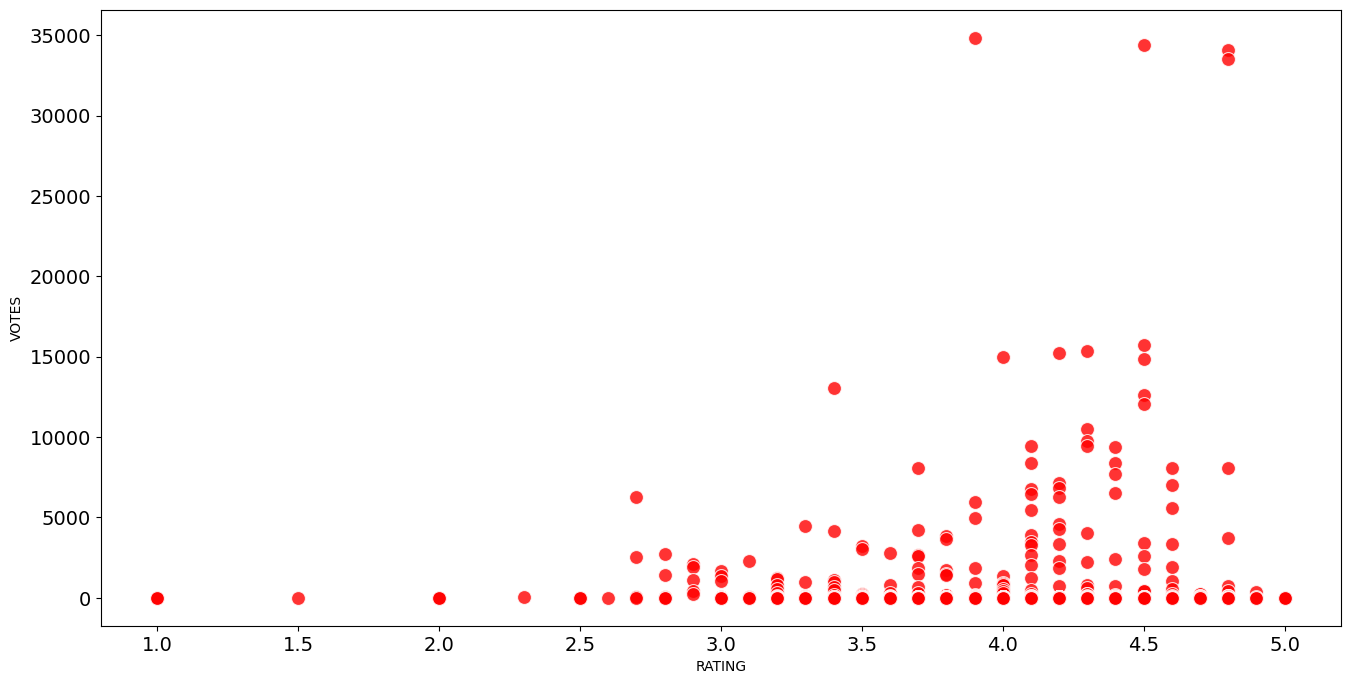

In [111]:
plt.rcParams["figure.figsize"]=(16,8)
sns.scatterplot(data=fandango, x="RATING", y="VOTES", 
                alpha=0.8, color= 'red', 
                s = 100)
plt.show()


Aşağıda iki farklı sitenin sütunlarını, 'derecelendirilmelerine' göre azalan şeklinde sıraladım. İlk 5 satırda en azından 1 tane filmin aynı olmasını bekledim. Fandango sitesinde 'RATING' sıralamaısna göre 5.0 olan filmler, diğer sitelerde üst sıralarda bile bulunmuyor. 
Üstelik bütün benzeri sitelerdeki 'IMDB' sıralamasına göre 2. sırada olan "Straight Outta Compton (2015)" filmi, 
eleştirmenler(RT) tarafından kullanıcılara(RT_Users) göre daha az beğenilmiş ve (-) değerdedir.

In [112]:
fandango.sort_values(by="RATING", ascending= False).head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
434,Z For Zachariah (2015),5.0,5.0,1,(2015),0.0
398,The Transporter Refueled (2015),5.0,5.0,2,(2015),0.0
296,National Theatre Live: Man and Superman (2015),5.0,5.0,10,(2015),0.0
304,Maze Runner: The Scorch Trials (2015),5.0,5.0,9,(2015),0.0
317,Cheatin' (2015),5.0,5.0,8,(2015),0.0


In [113]:
all_sites.sort_values(by = "IMDB", ascending= False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_DIFF
140,Inside Out (2015),98,90,94,8.9,8.6,807,96252,8
76,Straight Outta Compton (2015),90,94,72,7.3,8.4,90,15982,-4
95,The Salt of the Earth (2015),96,90,83,7.8,8.4,13,6605,6
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9
28,Wild Tales (2014),96,92,77,8.8,8.2,107,50285,4
